In [1]:
%matplotlib inline

In [2]:
import csv
import itertools
from matplotlib import pyplot

from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [3]:
# responses
entry_list = {}
exit_list = {}

# read files
with open('entry.csv') as file:
    reader = csv.DictReader(file)
    entry_list = [row for row in reader]
    
with open('exit.csv') as file:
    reader = csv.DictReader(file)
    exit_list = [row for row in reader]

In [4]:
entry_list[0]

{'Age': '18-24',
 'Education': 'Senior',
 'Full Name': '1',
 'Gender': 'Male',
 'I feel comfortable using the shell.': '2',
 'I feel that I have sufficient knowledge of the shell for what I need.': '3',
 'I feel that learning how to use new commands is easy.': '1',
 'I prefer command line tools to GUI tools.': '2',
 'I think I would prefer the shell if I understood it better (or already do).': '1',
 'I think the command line is easy to use.': '2',
 'I think the command line is more usable than a GUI.': '1',
 'I think the shell is easy to learn.': '3',
 'I use a wide array of commands.': '1',
 'I use control structures in the shell.': '4',
 'I use piping and redirection.': '1',
 'I use wild cards in the shell.': '1',
 'Major': 'Computer Science',
 'Please explain what tasks you commonly carry out on in the shell.': 'General systems administration-- editing, file searching, tunneling, scheduling, etc',
 'Primary Operating System': 'OS X',
 'When presented with a problem, I know the comma

In [5]:
exit_list[0]

{'I find the interface of the system inviting and usable.': '1',
 'I would prefer this to the normal shell experience': '3',
 'I would suggest this system to others.': '1',
 'I would use this system in the future.': '2',
 'Name': '1',
 'This system is more usable than a traditional shell.': '1',
 'This system would help me perform automations that I would not make on my own.': '1',
 'This system would help me solve problems in the shell.': '1',
 'This system would improve my usage of the shell.': '2',
 'This system would teach me commands in a more effective way that  the status quo.': '2',
 'Using this system would improve my understanding of all shells.': '2',
 'What did you like most about the system?': 'The demo was very instructive, so the system would be a good introduction for people who are brand new to using the shell.',
 'What do you think needs the most improvements?': "More instructions on what the buttons on bottom will do if pressed would be nice-- I know the functionalit

In [6]:
entered = [d['Full Name'] for d in entry_list]
exited = [d['Name'] for d in exit_list]
ppl = [int(name) for name in entered if name in exited]
set([x['Education'] for x in entry_list])

{'Graduate', 'Junior', 'Senior', 'Sophomore'}

In [7]:
usability_qs = [
    'I think the command line is easy to use.',
    'I think the command line is more usable than a GUI.',
    'I feel comfortable using the shell.',
    'I prefer command line tools to GUI tools.',
    'I think I would prefer the shell if I understood it better (or already do).',
    'I think the shell is easy to learn.'
]

efficiency_qs = [
    'I use a wide array of commands.',
    'I use control structures in the shell.',
    'I use piping and redirection.'
]

knowledge_qs = [
    'When presented with a problem, I know the commands to use.',
    'I feel that learning how to use new commands is easy.',
    'I use a wide array of commands.',
    'I feel that I have sufficient knowledge of the shell for what I need.'
]

qual_qs = [
    'Please explain what tasks you commonly carry out on in the shell.',
    'What did you like most about the system?',
    'What do you think needs the most improvements?'
]

In [8]:
entry_dict = {}
exit_dict = {}
qualitative = {}

for name in ppl:
    for d in entry_list:
        if d['Full Name'] == str(name):
            entry_dict[name] = {k:(int(v) if v.isdigit() else v) for k,v in d.items()}
            entry_dict[name].pop('Full Name')
            qualitative[name] = {qual_qs[0]: entry_dict[name].pop(qual_qs[0])}

    for d in exit_list:
        if d['Name'] == str(name):
            exit_dict[name] = {k:(int(v) if v.isdigit() else v) for k,v in d.items()}
            exit_dict[name].pop('Name')
            qualitative[name][qual_qs[1]] = exit_dict[name].pop(qual_qs[1])
            qualitative[name][qual_qs[2]] = exit_dict[name].pop(qual_qs[2])

In [9]:
full_dict = {}

for person in entry_dict:
    full_dict[person] = entry_dict[person].copy()
    full_dict[person].update(exit_dict[person])

In [10]:
full_dict[ppl[0]]

{'Age': '18-24',
 'Education': 'Senior',
 'Gender': 'Male',
 'I feel comfortable using the shell.': 2,
 'I feel that I have sufficient knowledge of the shell for what I need.': 3,
 'I feel that learning how to use new commands is easy.': 1,
 'I find the interface of the system inviting and usable.': 1,
 'I prefer command line tools to GUI tools.': 2,
 'I think I would prefer the shell if I understood it better (or already do).': 1,
 'I think the command line is easy to use.': 2,
 'I think the command line is more usable than a GUI.': 1,
 'I think the shell is easy to learn.': 3,
 'I use a wide array of commands.': 1,
 'I use control structures in the shell.': 4,
 'I use piping and redirection.': 1,
 'I use wild cards in the shell.': 1,
 'I would prefer this to the normal shell experience': 3,
 'I would suggest this system to others.': 1,
 'I would use this system in the future.': 2,
 'Major': 'Computer Science',
 'Primary Operating System': 'OS X',
 'This system is more usable than a t

In [11]:
set(n for p in ppl for n in exit_dict[p].values())

{1, 2, 3, 4}

In [12]:
def pull_users(table, key, pred):
    return [k for k, v in table.items() if pred(v.get(key))]

pull_users(entry_dict, 'Education', lambda x: x == 'Senior')
pull_users(exit_dict, 'I find the interface of the system inviting and usable.', lambda x: int(x) > 2)

[16]

In [13]:
def pull_data(table, users, key):
    return [table[x][key] for x in users]

seniors = pull_users(entry_dict, 'Education', lambda x: x == 'Senior')
usability = pull_data(exit_dict, ppl, 'I find the interface of the system inviting and usable.')
seniors

[1, 9, 17, 20, 21, 22, 27]

In [14]:
def by_response(table, key):
    tally = {}
    for k in table.keys():
        if k in tally:
            tally[table[k][key]].append(k)
        else:
            tally[table[k][key]] = [k]
    return tally

In [15]:
def crunch_numbers(table, questions, label):
    for k in table.keys():
        sum = 0
        for q in questions:
            sum += table[k][q]
            
        table[k][label] = '{:.2}'.format(sum / len(questions))

In [16]:
labels = {'Reported Usability Rating': usability_qs,
          'Reported Efficiency Rating': efficiency_qs,
          'Reported Knowledge Rating': knowledge_qs
         }

for label, lst in labels.items():
    crunch_numbers(full_dict, lst, label)

In [17]:
def autocolor(table, group, key):
    colors = itertools.cycle(['lightcoral', 'powderblue', 'lightsage', 'moccasin', 'honeydew'])
    edudict = {k:v for v, k in enumerate(['Sophomore', 'Junior', 'Senior', 'Graduate'])}
    data = set(pull_data(table, group, key))
    
    return list(zip(sorted(data, key=lambda x: edudict.get(x, x)), colors))

/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


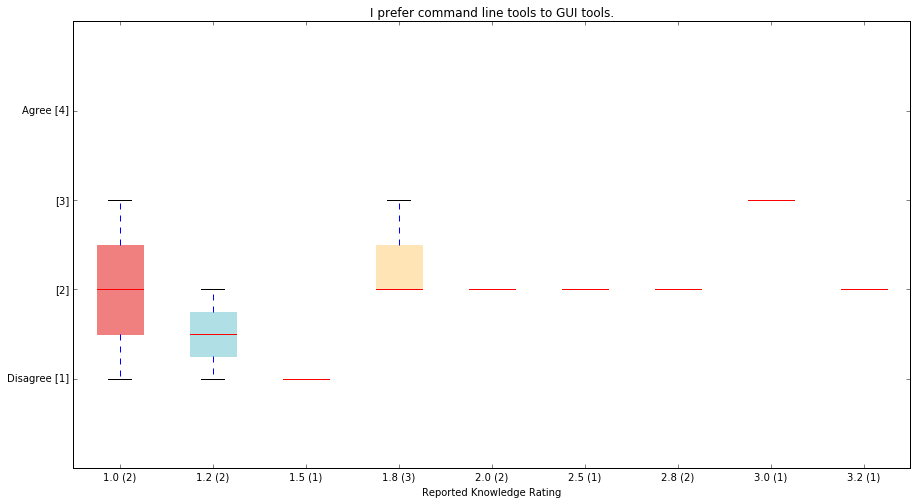

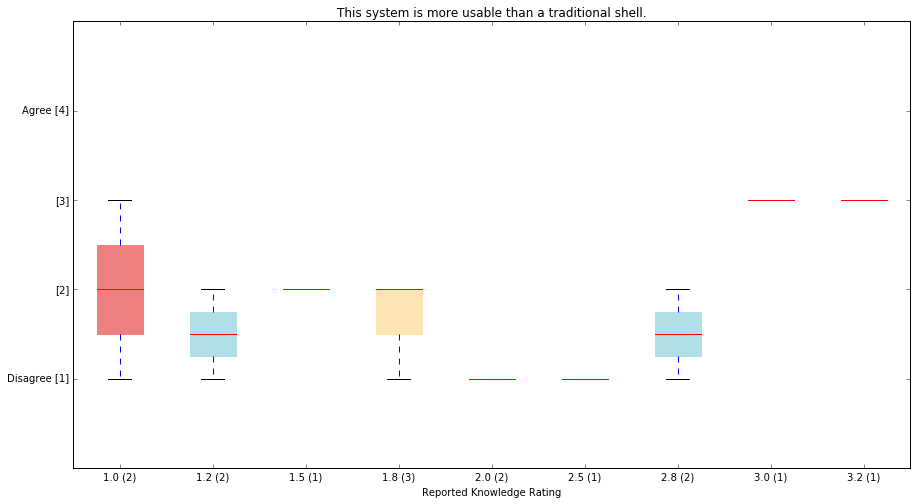

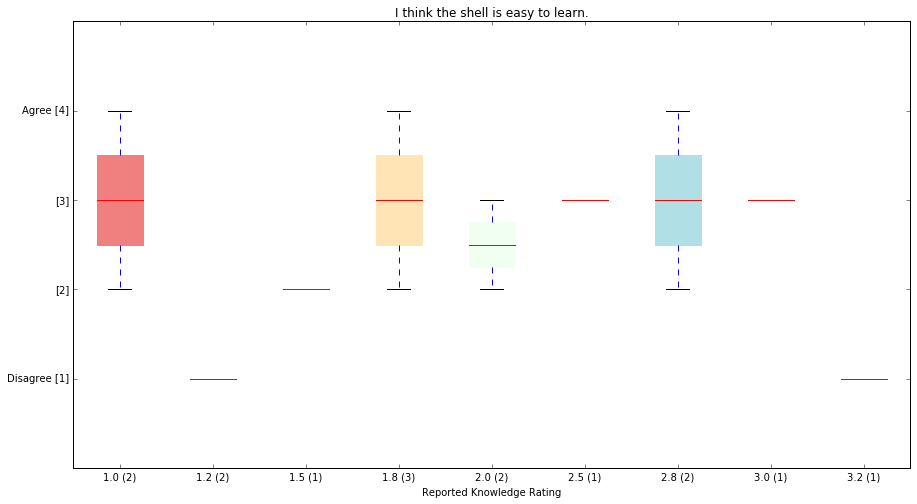

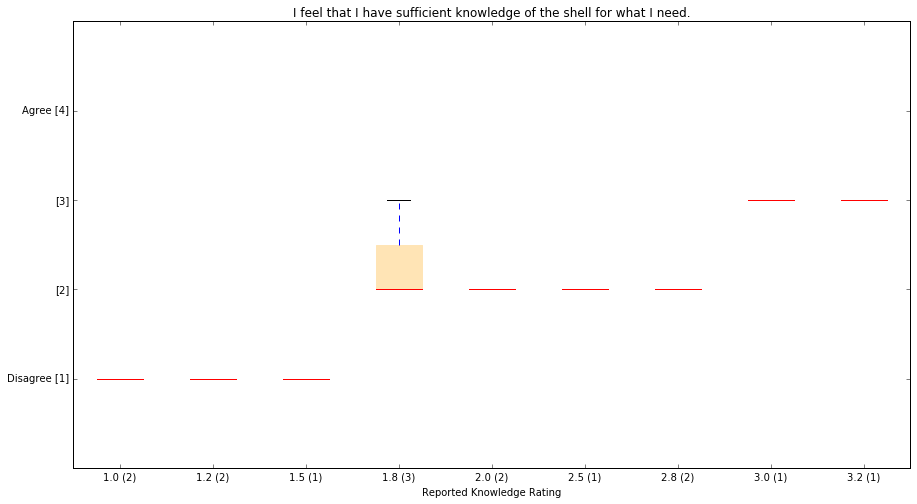

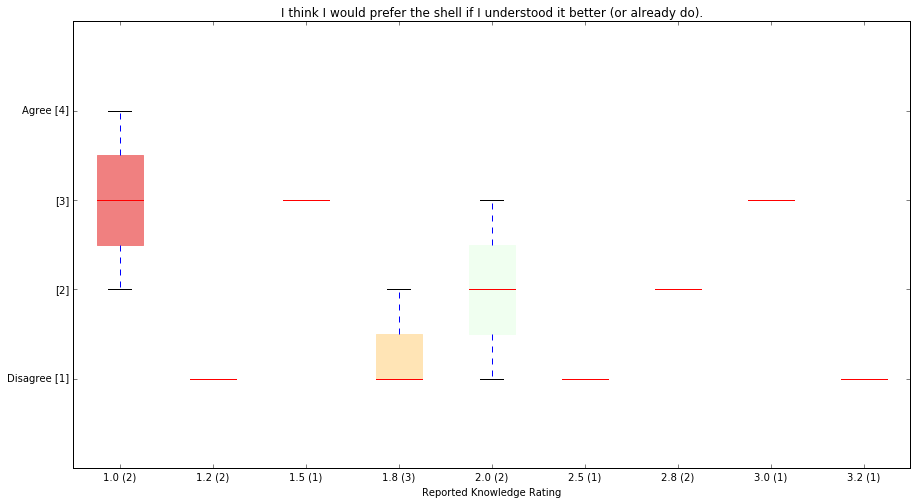

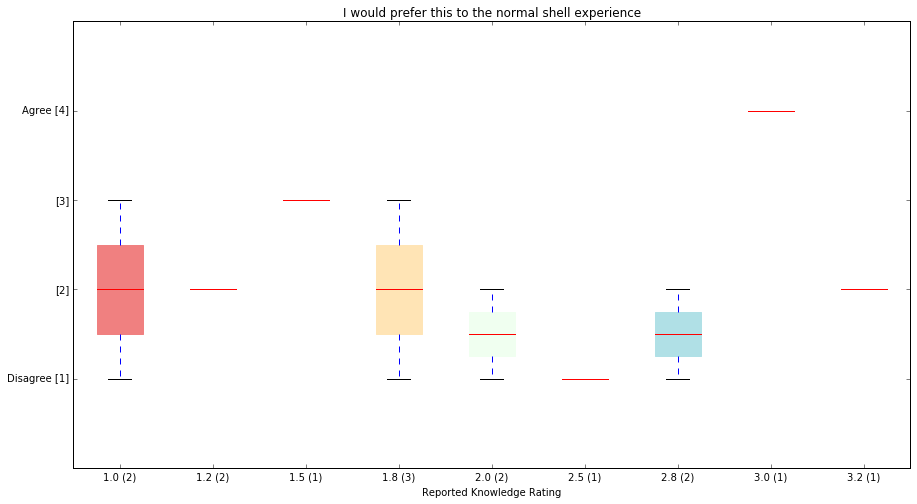

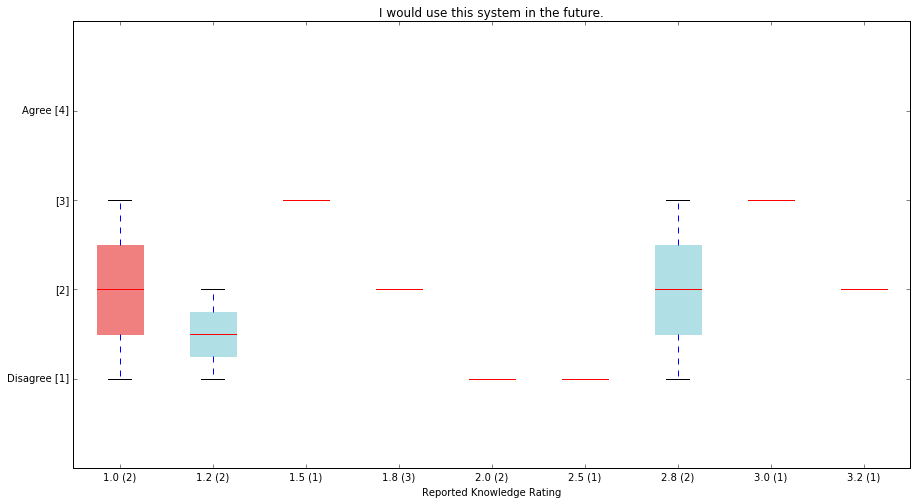

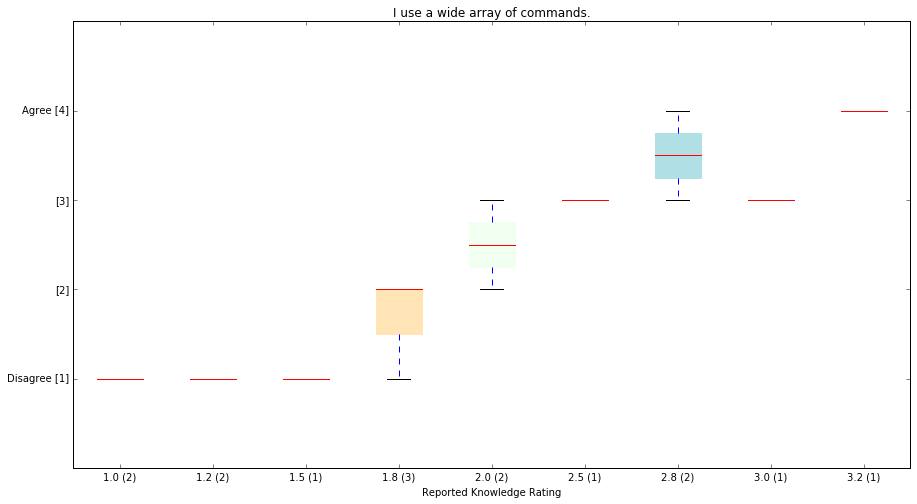

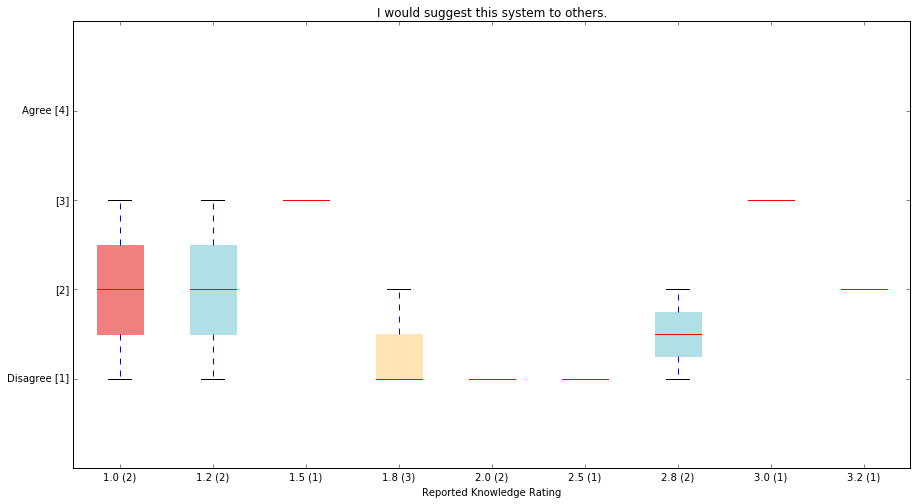

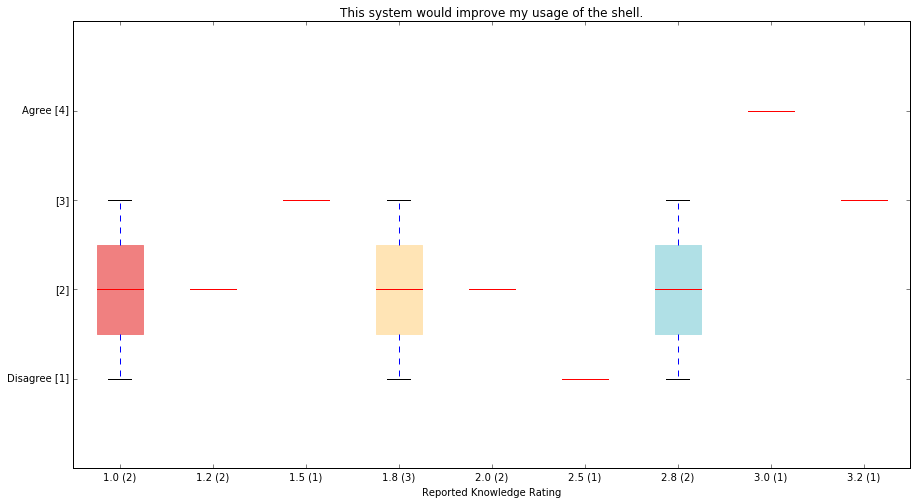

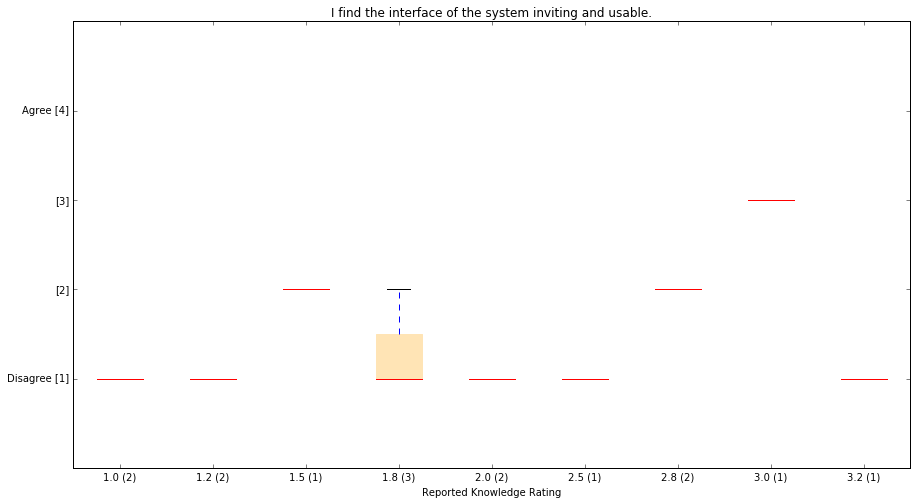

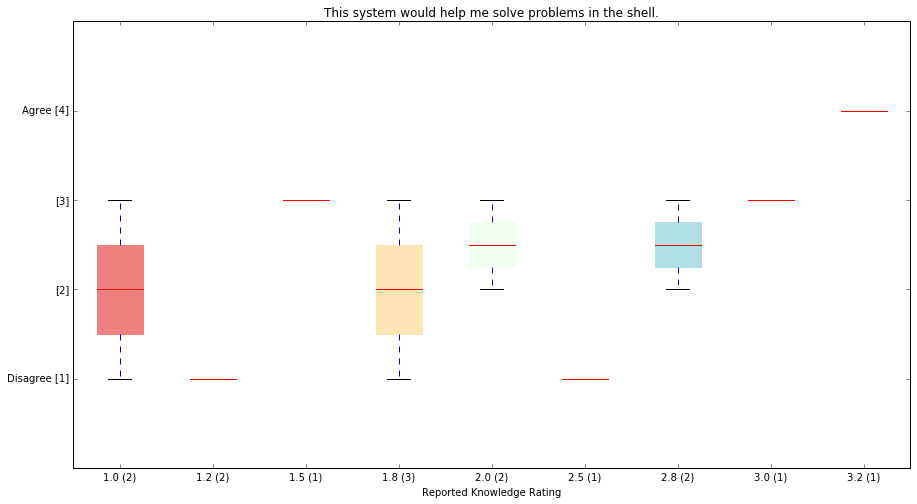

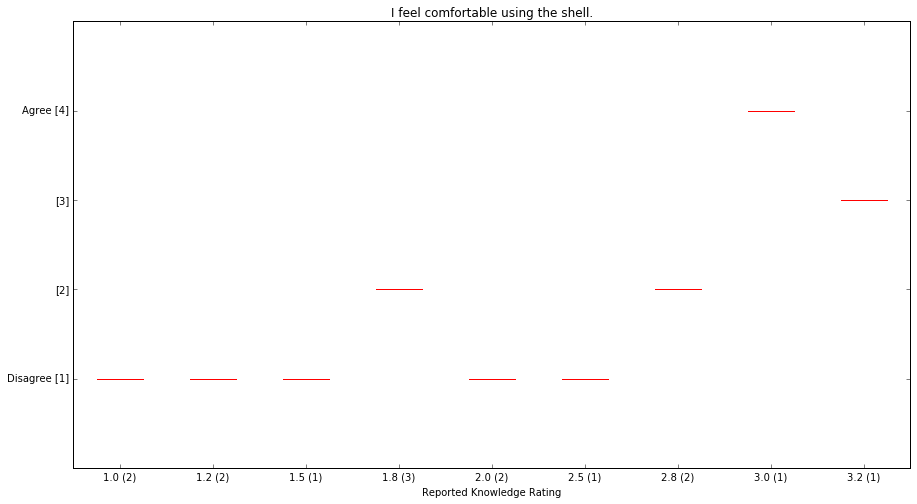

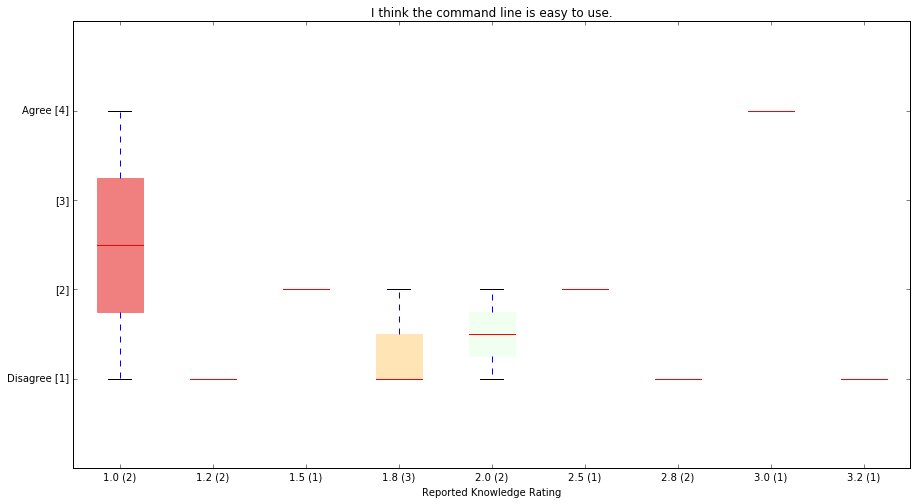

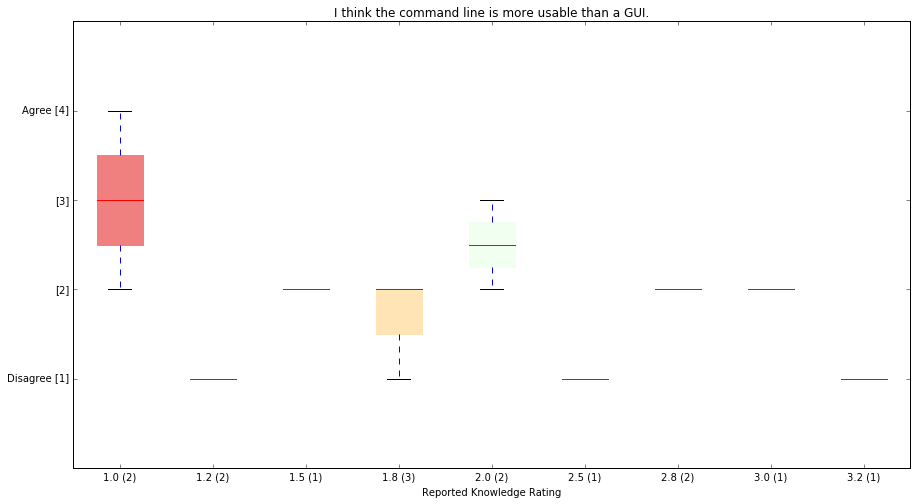

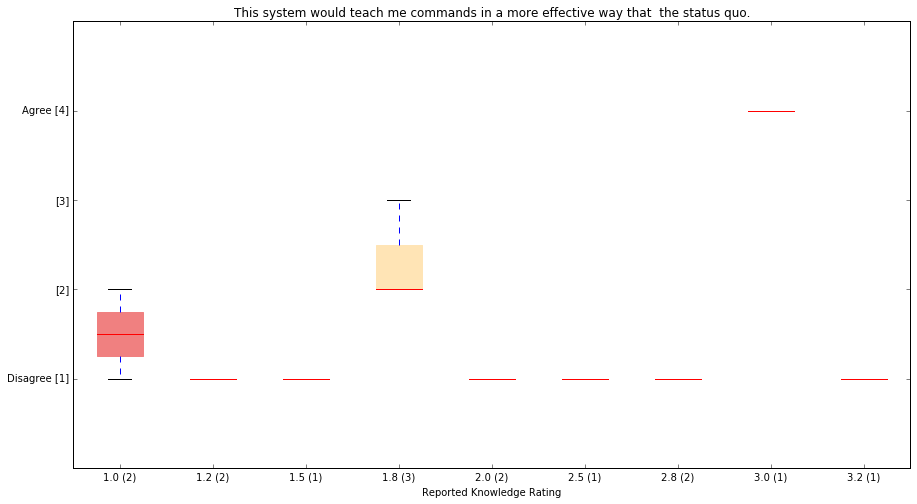

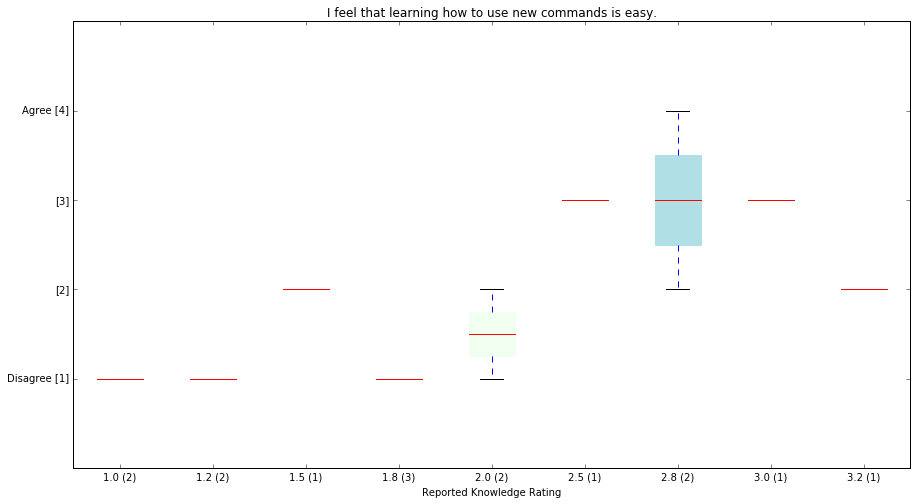

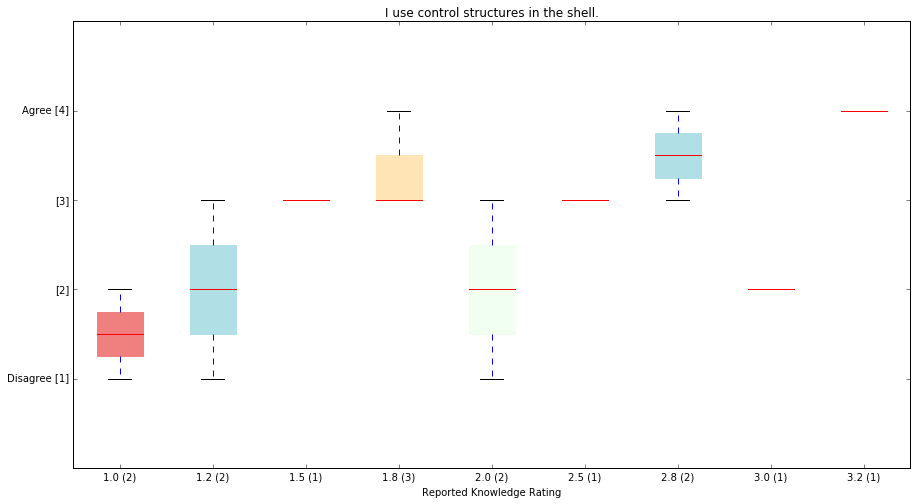

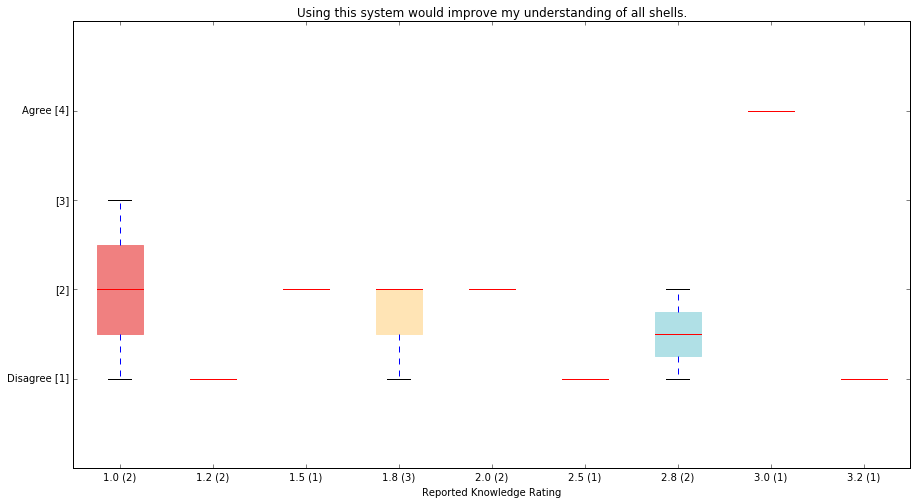

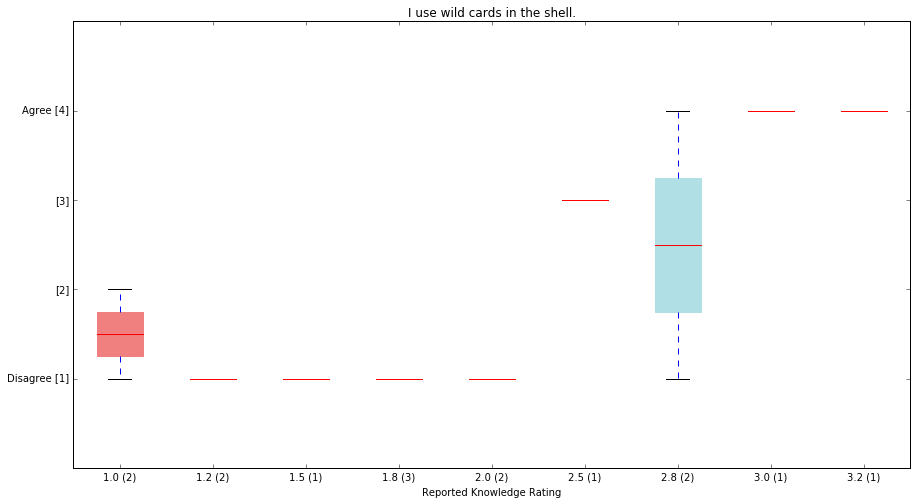

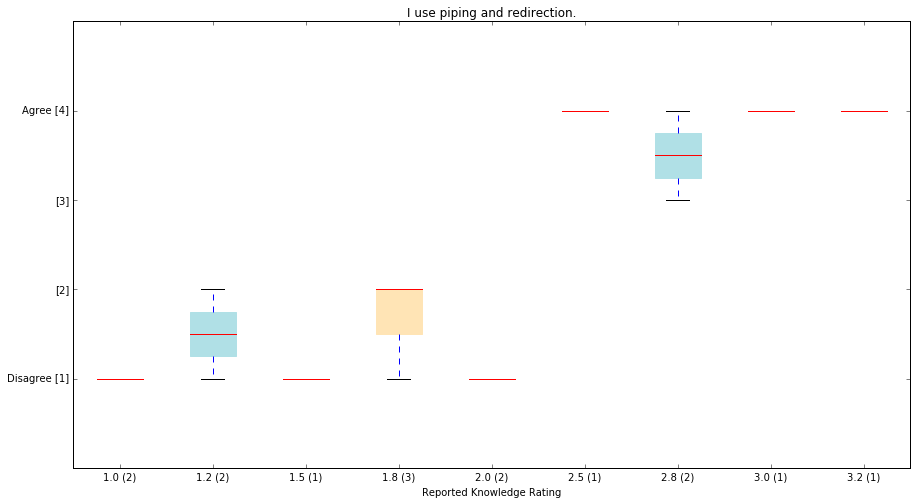

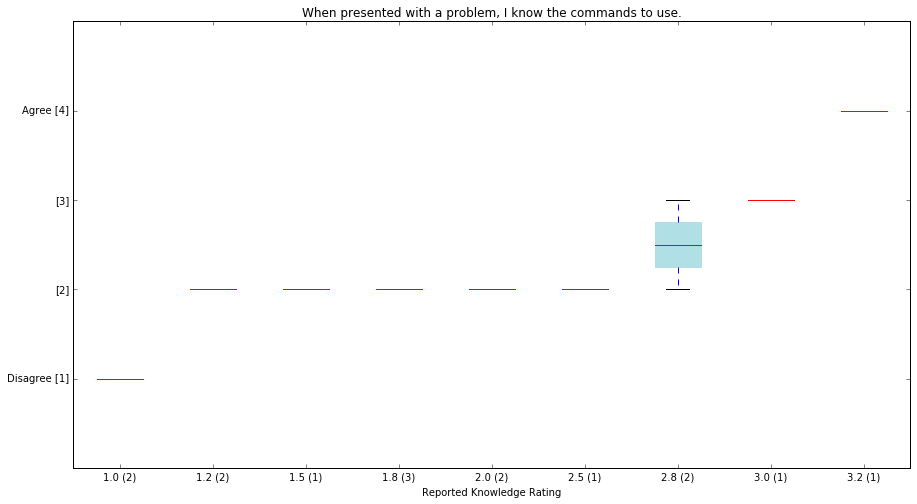

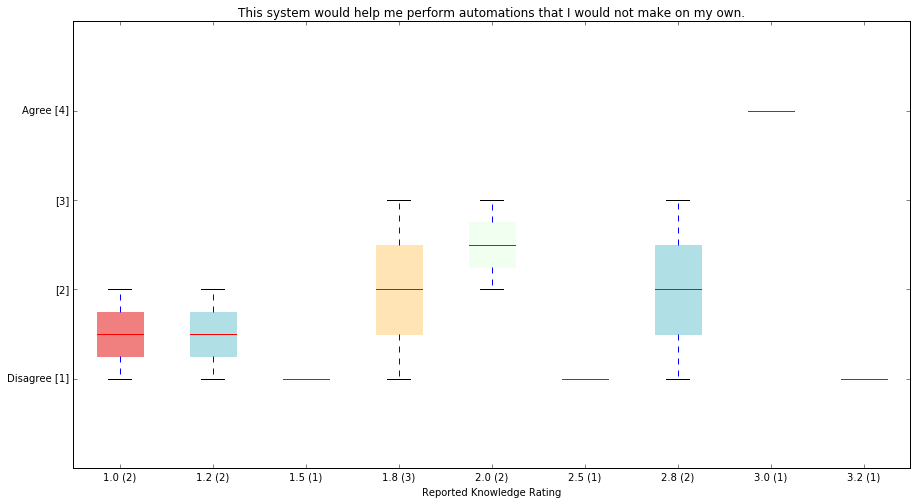

In [19]:
def plot_all(table, selector):
    groups = autocolor(full_dict, table.keys(), selector)

    for key in table[ppl[0]].keys():
        if not isinstance(table[1][key], int):
            continue
    
        data = []
        count = []
        fig = pyplot.figure()
        pyplot.title(key)

        for g in groups:
            people = pull_users(table, selector, lambda x: x == g[0])
            count.append(len(people))
            data.append(pull_data(table, people, key))
            
        plt = pyplot.boxplot(data, vert=True, patch_artist=True) # , notch=True)
        
        for p in zip(plt['boxes'], groups):
            pyplot.setp(p[0], color=p[1][1])
            pyplot.setp(p[0], label=p[1][0])
        
        xlabels = ["{} ({})".format(x[0], y) for x, y in zip(groups, count)]
        ylabels = ['Disagree [1]', '[2]', '[3]', 'Agree [4]']
        pyplot.xticks(range(1, len(groups) + 1), xlabels)
        pyplot.yticks(range(1, len(groups) + 1), ylabels)
        pyplot.xlabel(selector)
        pyplot.ylim([0, 5])
        
plot_all(full_dict, 'Reported Knowledge Rating')